# 227. INSTALAR LIBRERÍA RPY2

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
import rpy2 #lo podemos intepretar como un traductor entre un idiomas y otro. 

In [6]:
#sublibrerias para combinar r con python 
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri #numpy2ri convierte objetos numpy a objetos de rpy2, que son objetos de R. 

In [8]:
rpy2.robjects.numpy2ri.activate()

# 229. LLEVANDO OBJETOS DE R A PYTHON 

In [9]:
codigo_r = """
saludar <- function(cadena){
return(paste("Hola, ", cadena))
}

"""
#esto ya es una funcion de R, que la hemos guardado como si se tratara de un string en python, 
#pero la ventaja es que ahora podemos llamar ro. 

In [11]:
ro.r(codigo_r)
#arriba hemos creado una funcion llamada saludar y que ahora esta disponible en el espacio de variables globales de R. 
#en particular podemos acceder a esa funcion que hemos recompilado en python a traves de R. 

<rpy2.robjects.functions.SignatureTranslatedFunction object at 0x00000268F9269D00> [RTYPES.CLOSXP]
R classes: ('function',)

In [12]:
saludar_py = ro.globalenv["saludar"]

In [14]:
 res = saludar_py("Antonio Banderas")

In [15]:
res[0]

'Hola,  Antonio Banderas'

## ¿COMO PODRIAMOS HACER PARA ALGO QUE CREEMOS EN PYTHON ESTE DISPONIBLE EN R?
### USAR R DENTRO DE PYTHON 

In [16]:
var_from_python = ro.FloatVector(np.arange(1,5,0.1)) #variable que hemos creado desde python 

In [17]:
var_from_python

1.000000,1.100000,1.200000,...,4.700000,4.800000,4.900000


In [18]:
#para usarlo en R. 
print(var_from_python.r_repr()) #es la sintaxis en R. 

c(1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 
2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 
4.9)


In [19]:
ro.globalenv["var_to_r"] = var_from_python
#esto lo que dice es que:
#añade en R, una variable que se llamara var_to_r, apartir de la variable desde python. 

In [20]:
ro.r("var_to_r")

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [21]:
ro.r("sum(var_to_r)")

array([118.])

In [22]:
ro.r("mean(var_to_r)")

array([2.95])

In [23]:
ro.r("sd(var_to_r)")

array([1.16904519])

In [24]:
np.sum(var_from_python)

118.00000000000007

In [25]:
np.mean(var_from_python)

2.950000000000002

# 231. COMO INSTALAR Y CARGAR PAQUETES DE R DESDE PYTHON 

Instalar paquetes de R, trabajar de forma conjunta entre R y Python, R viene instalado con unos paquetes basicos, para ello rpy2 y sus subpaquetes nos van a ayudar a importar la librerua importr, esta nos sirve para importar paquetes. 

In [26]:
from rpy2.robjects.packages import importr 

In [27]:
#llamado a una funcion de r. 
ro.r("install.packages('extRemes')")
extremes = importr("extRemes") #esto seria el equivalente de library(extRemes).

R[write to console]: Installing package into 'C:/Users/URIEL/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



--- Please select a CRAN mirror for use in this session ---


R[write to console]: also installing the dependencies 'Lmoments', 'distillery'


R[write to console]: trying URL 'https://cran.itam.mx/bin/windows/contrib/4.0/Lmoments_1.3-1.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 846130 bytes (826 KB)

R[write to console]: downloaded 826 KB


R[write to console]: trying URL 'https://cran.itam.mx/bin/windows/contrib/4.0/distillery_1.2.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 122109 bytes (119 KB)

R[write to console]: downloaded 119 KB


R[write to console]: trying URL 'https://cran.itam.mx/bin/windows/contrib/4.0/extRemes_2.1.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 1222345 bytes (1.2 MB)

R[write to console]: downloaded 1.2 MB




package 'Lmoments' successfully unpacked and MD5 sums checked
package 'distillery' successfully unpacked and MD5 sums checked
package 'extRemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\URIEL\AppData\Local\Temp\RtmpOQ9Asd\downloaded_packages


In [28]:
fevd = extremes.fevd

In [29]:
print(fevd.__doc__)

Wrapper around an R function.

The docstring below is built from the R documentation.

description
-----------


 Fit a univariate extreme value distribution functions (e.g., GEV, GP, PP, Gumbel, or Exponential) to data; possibly with covariates in the parameters.
 


fevd(
    x,
    data,
    threshold = rinterface.NULL,
    threshold_fun = ~,
    location_fun = ~,
    scale_fun = ~,
    shape_fun = ~,
    use_phi = False,
    type = c,
    method = c,
    initial = rinterface.NULL,
    span,
    units = rinterface.NULL,
    time_units = days,
    period_basis = year,
    na_action = <rpy2.rinterface.ListSexpVector object at 0x00000268F631A0C0> [RTYPES.VECSXP],
    optim_args = rinterface.NULL,
    priorFun = rinterface.NULL,
    priorParams = rinterface.NULL,
    proposalFun = rinterface.NULL,
    proposalParams = rinterface.NULL,
    iter = 9999.0,
    weights = 1.0,
    blocks = rinterface.NULL,
    verbose = False,
)

Args:
   x :  'fevd': 'x' can be a numeric vector, the name of

In [52]:
data = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/time/time_series.txt", sep = "\s+",
                   skiprows = 1, parse_dates = [[0,1]], 
                   names = ["date", "time", "wind_speed"], 
                  index_col = 0)

In [53]:
data.head(5)

,wind_speed
date_time,
1983-01-01 00:00:00,7.9
1983-01-01 01:00:00,8.2
1983-01-01 02:00:00,8.5
1983-01-01 03:00:00,9.0
1983-01-01 04:00:00,9.9


In [54]:
data.shape

(275352, 1)

In [56]:
max_ws = data.wind_speed.groupby(pd.Grouper(freq = "A")).max()
#lo que hacemos aqui es que la columna wind speed de los datos, la agrupo por año y despues de eso, nos quedamos con el maximo
#valor de cada uno de ellos. 

In [57]:
max_ws #la fecha maxima de cada uno de las velocidades del viento, asi solo tendriamos que dibujar los 
#valores maximos anuales. 

date_time
1983-12-31    22.2
1984-12-31    25.5
1985-12-31    21.5
1986-12-31    22.5
1987-12-31    23.7
1988-12-31    22.5
1989-12-31    21.7
1990-12-31    29.7
1991-12-31    24.2
1992-12-31    23.8
1993-12-31    28.1
1994-12-31    23.4
1995-12-31    23.7
1996-12-31    25.6
1997-12-31    23.2
1998-12-31    24.9
1999-12-31    22.8
2000-12-31    24.6
2001-12-31    22.3
2002-12-31    25.5
2003-12-31    22.6
2004-12-31    24.0
2005-12-31    20.8
2006-12-31    23.5
2007-12-31    24.4
2008-12-31    24.1
2009-12-31    25.1
2010-12-31    19.4
2011-12-31    22.8
2012-12-31    24.2
2013-12-31    25.0
2014-12-31    25.3
Freq: A-DEC, Name: wind_speed, dtype: float64

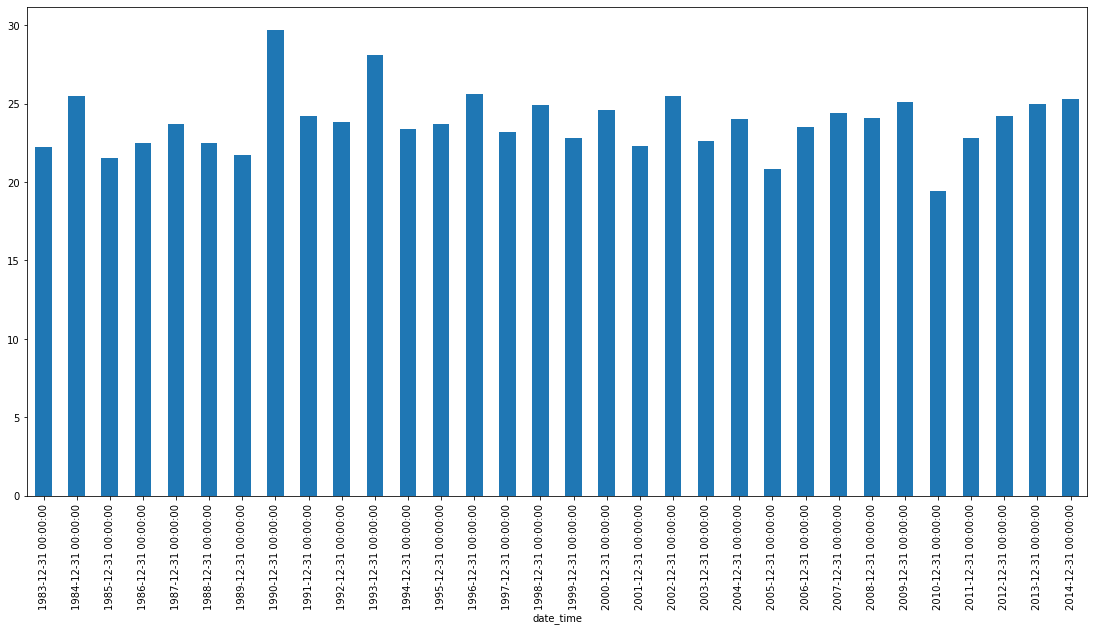

In [59]:
max_ws.plot(kind ="bar", figsize = (19,9))

Recodermos que tenemos la funcion fevd; distribucion para ajustar el valor maximo, del paquete extreme de R, para usarla directamente con los maximos que hemos obtenido con pandas desde python. Calcularemos los parametros, guardandolo en python, siendo libreria de R. 

In [60]:
#llamamos a la funcion 
result = fevd(max_ws.values, type = "GEV", method = "GMLE")
#esta funcion es de R. 

In [61]:
print(type(result)) #vector formado por listas. 

<class 'rpy2.robjects.vectors.ListVector'>


In [62]:
result.r_repr #tenemos el propio objeto de R que ha creado la libreria. 

<bound method RObjectMixin.r_repr of <rpy2.robjects.vectors.ListVector object at 0x00000268883AC600> [RTYPES.VECSXP]
R classes: ('fevd',)
[LangSexpV..., StrSexpVe..., FloatSexp..., BoolSexpV..., ..., StrSexpVe..., StrSexpVe..., ListSexpV..., ListSexpV...]
  call: <class 'rpy2.robjects.language.LangVector'>
  Rlang( (function (x, data, threshold = NULL, threshold.fun = ~1, location.fun = ~1,  )
  data.name: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x0000026888CDD340> [RTYPES.STRSXP]
R classes: ('character',)
['struct..., '23.8, ..., '22.6, ..., '25.3),..., '']
  weights: <class 'numpy.ndarray'>
  array([1.])
  missing.values: <class 'rpy2.robjects.vectors.BoolArray'>
  <rpy2.robjects.vectors.BoolArray object at 0x000002688891B500> [RTYPES.LGLSXP]
R classes: ('array',)
[       0,        0,        0,        0, ...,        0,        0,        0,        0]
...
  x: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector obje

In [64]:
print(result.names) #tiene 20 variables

 [1] "call"            "data.name"       "weights"         "missing.values" 
 [5] "in.data"         "x"               "priorFun"        "priorParams"    
 [9] "method"          "type"            "period.basis"    "par.models"     
[13] "const.loc"       "const.scale"     "const.shape"     "n"              
[17] "na.action"       "parnames"        "results"         "initial.results"



In [65]:
res = result.rx("results")

In [69]:
print(res[0])

$par
  location      scale      shape 
23.0639415  1.7576913 -0.1628816 

$value
[1] 1e+16

$counts
function gradient 
       1        1 

$convergence
[1] 0

$message
NULL

$hessian
         location scale shape
location        0     0     0
scale           0     0     0
shape           0     0     0

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
[1] 1



